In [1]:
import mmcv
from mmcv.runner import load_checkpoint
from vitmvt.models import build_algorithm

from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

# customize config and checkpoint
device='cuda:0'
config = '/home/dk/vitmvt/configs/nas/vit_mvt_base/task_seg.py'
checkpoint = '/home/dk/base_vit_mvt_seg.pth'

cfg = mmcv.Config.fromfile(config)
model = build_algorithm(cfg.algorithm)
checkpoint = load_checkpoint(model, checkpoint, map_location=device)
# We need to set the model's cfg for inference
model.model.CLASSES = checkpoint['meta']['CLASSES']
model.cfg = cfg
# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()
print(model)

/home/dk/.conda/envs/HSCXT/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dk/.conda/envs/HSCXT/lib/python3.7/site-packages/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /home/dk/base_vit_mvt_seg.pth
ViT_MVT(
  (model): EncoderDecoderSearch(
    (backbone): VIT_MVT_BACKBONE(
      (cnn_pre): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (patch_embed): Patchembed(
        (proj): Conv2d(64, 576, kernel_size=(8, 8), stride=(8, 8))
      )
      (pos_embed): ParameterSlice_export()
      (layers): Sequential

/home/dk/.conda/envs/HSCXT/lib/python3.7/site-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/dk/.conda/envs/HSCXT/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/home/dk/.conda/envs/HSCXT/lib/python3.7/site-packages/mmseg/models/segmentors/base.py

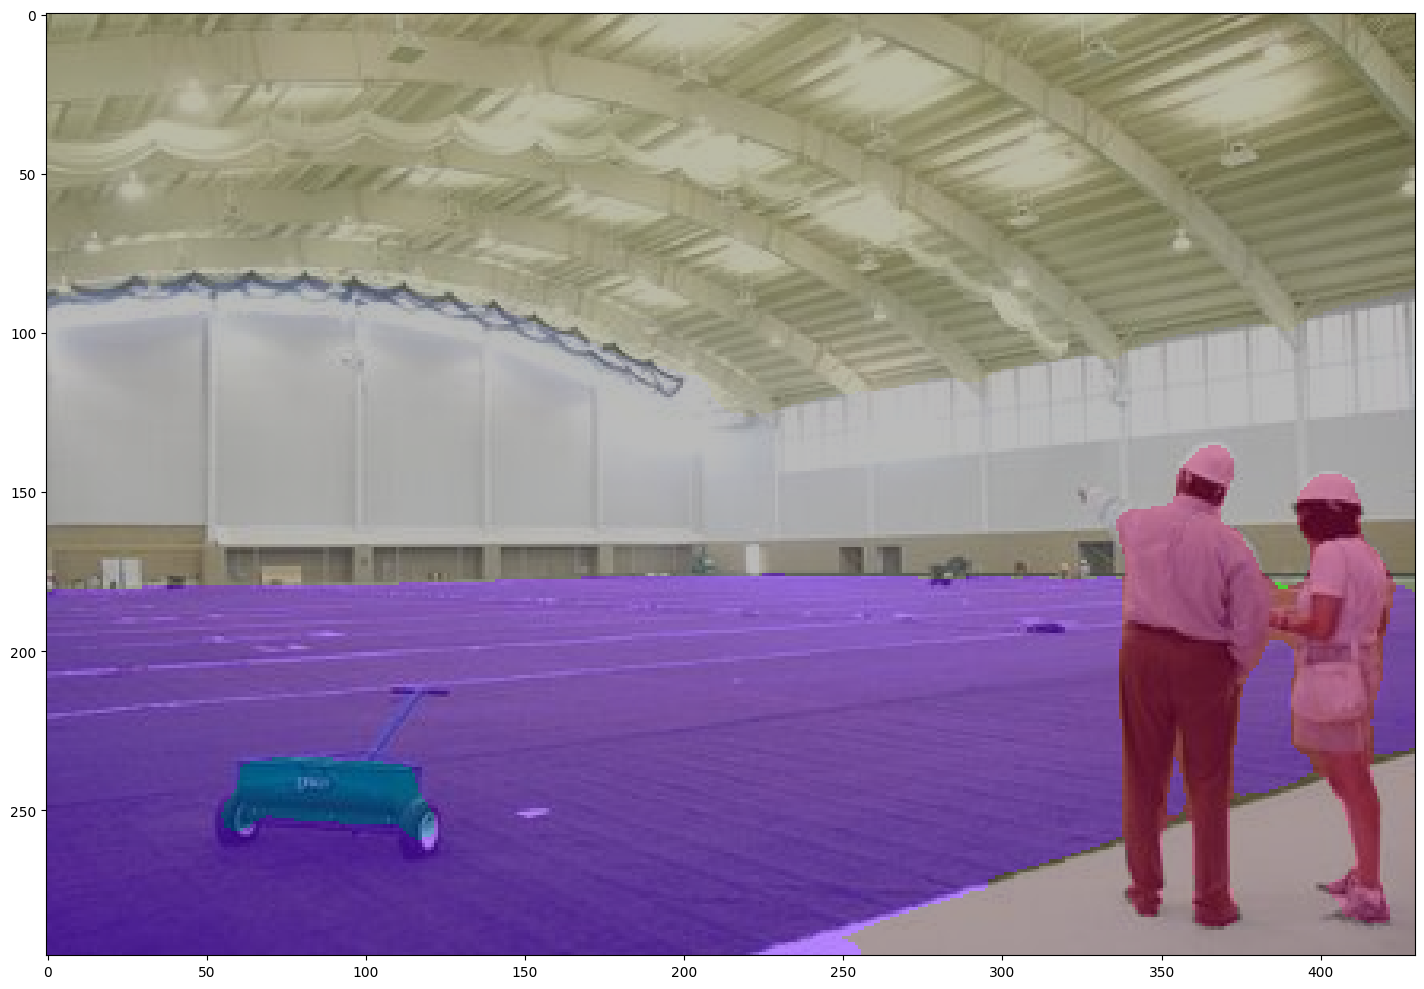

In [2]:
# customize your dataset path
img = '/home/dk/vitmvt/demo/semantic_demo.jpg'
result = inference_segmentor(model, img)

show_result_pyplot(model.model, img, result, get_palette('ade20k'))

